In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [106]:
df = pd.read_csv('Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [107]:
df.shape

(2938, 22)

In [108]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [109]:
df.isna().any()

Country                            False
Year                               False
Status                             False
Life expectancy                     True
Adult Mortality                     True
infant deaths                      False
Alcohol                             True
percentage expenditure             False
Hepatitis B                         True
Measles                            False
 BMI                                True
under-five deaths                  False
Polio                               True
Total expenditure                   True
Diphtheria                          True
 HIV/AIDS                          False
GDP                                 True
Population                          True
 thinness  1-19 years               True
 thinness 5-9 years                 True
Income composition of resources     True
Schooling                           True
dtype: bool

In [110]:
df.dropna(inplace= True)

In [111]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [112]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["encCountry"] = le.fit_transform(df.Country)
df["encYear"] = le.fit_transform(df.Year)
df['encStatus'] = le.fit_transform(df.Status)
df = df.drop(columns=['Country', 'Year', 'Status'])

In [113]:
df = df.rename(columns={
    "Life expectancy" : "life_expectancy",
    "Adult Mortality" : "adult_mortality",
    "infant deaths" : "infant_deaths",
    "percentage expenditure" : "percent_expenditure",
    "Hepatitis B" : "hepa_B",
    "Total expenditure" : "total_expanditure",
    " thinness  1-19 years" : "thin_1_19",
    " thinness 5-9 years" : "thin_1_5",
    "Income composition of resources" : "income_compo_resource"
})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Life expectancy        1649 non-null   float64
 1   adult_mortality        1649 non-null   float64
 2   infant_deaths          1649 non-null   int64  
 3   Alcohol                1649 non-null   float64
 4   percent_expenditure    1649 non-null   float64
 5   hepa_B                 1649 non-null   float64
 6   Measles                1649 non-null   int64  
 7    BMI                   1649 non-null   float64
 8   under-five deaths      1649 non-null   int64  
 9   Polio                  1649 non-null   float64
 10  total_expanditure      1649 non-null   float64
 11  Diphtheria             1649 non-null   float64
 12   HIV/AIDS              1649 non-null   float64
 13  GDP                    1649 non-null   float64
 14  Population             1649 non-null   float64
 15  thin_1_19

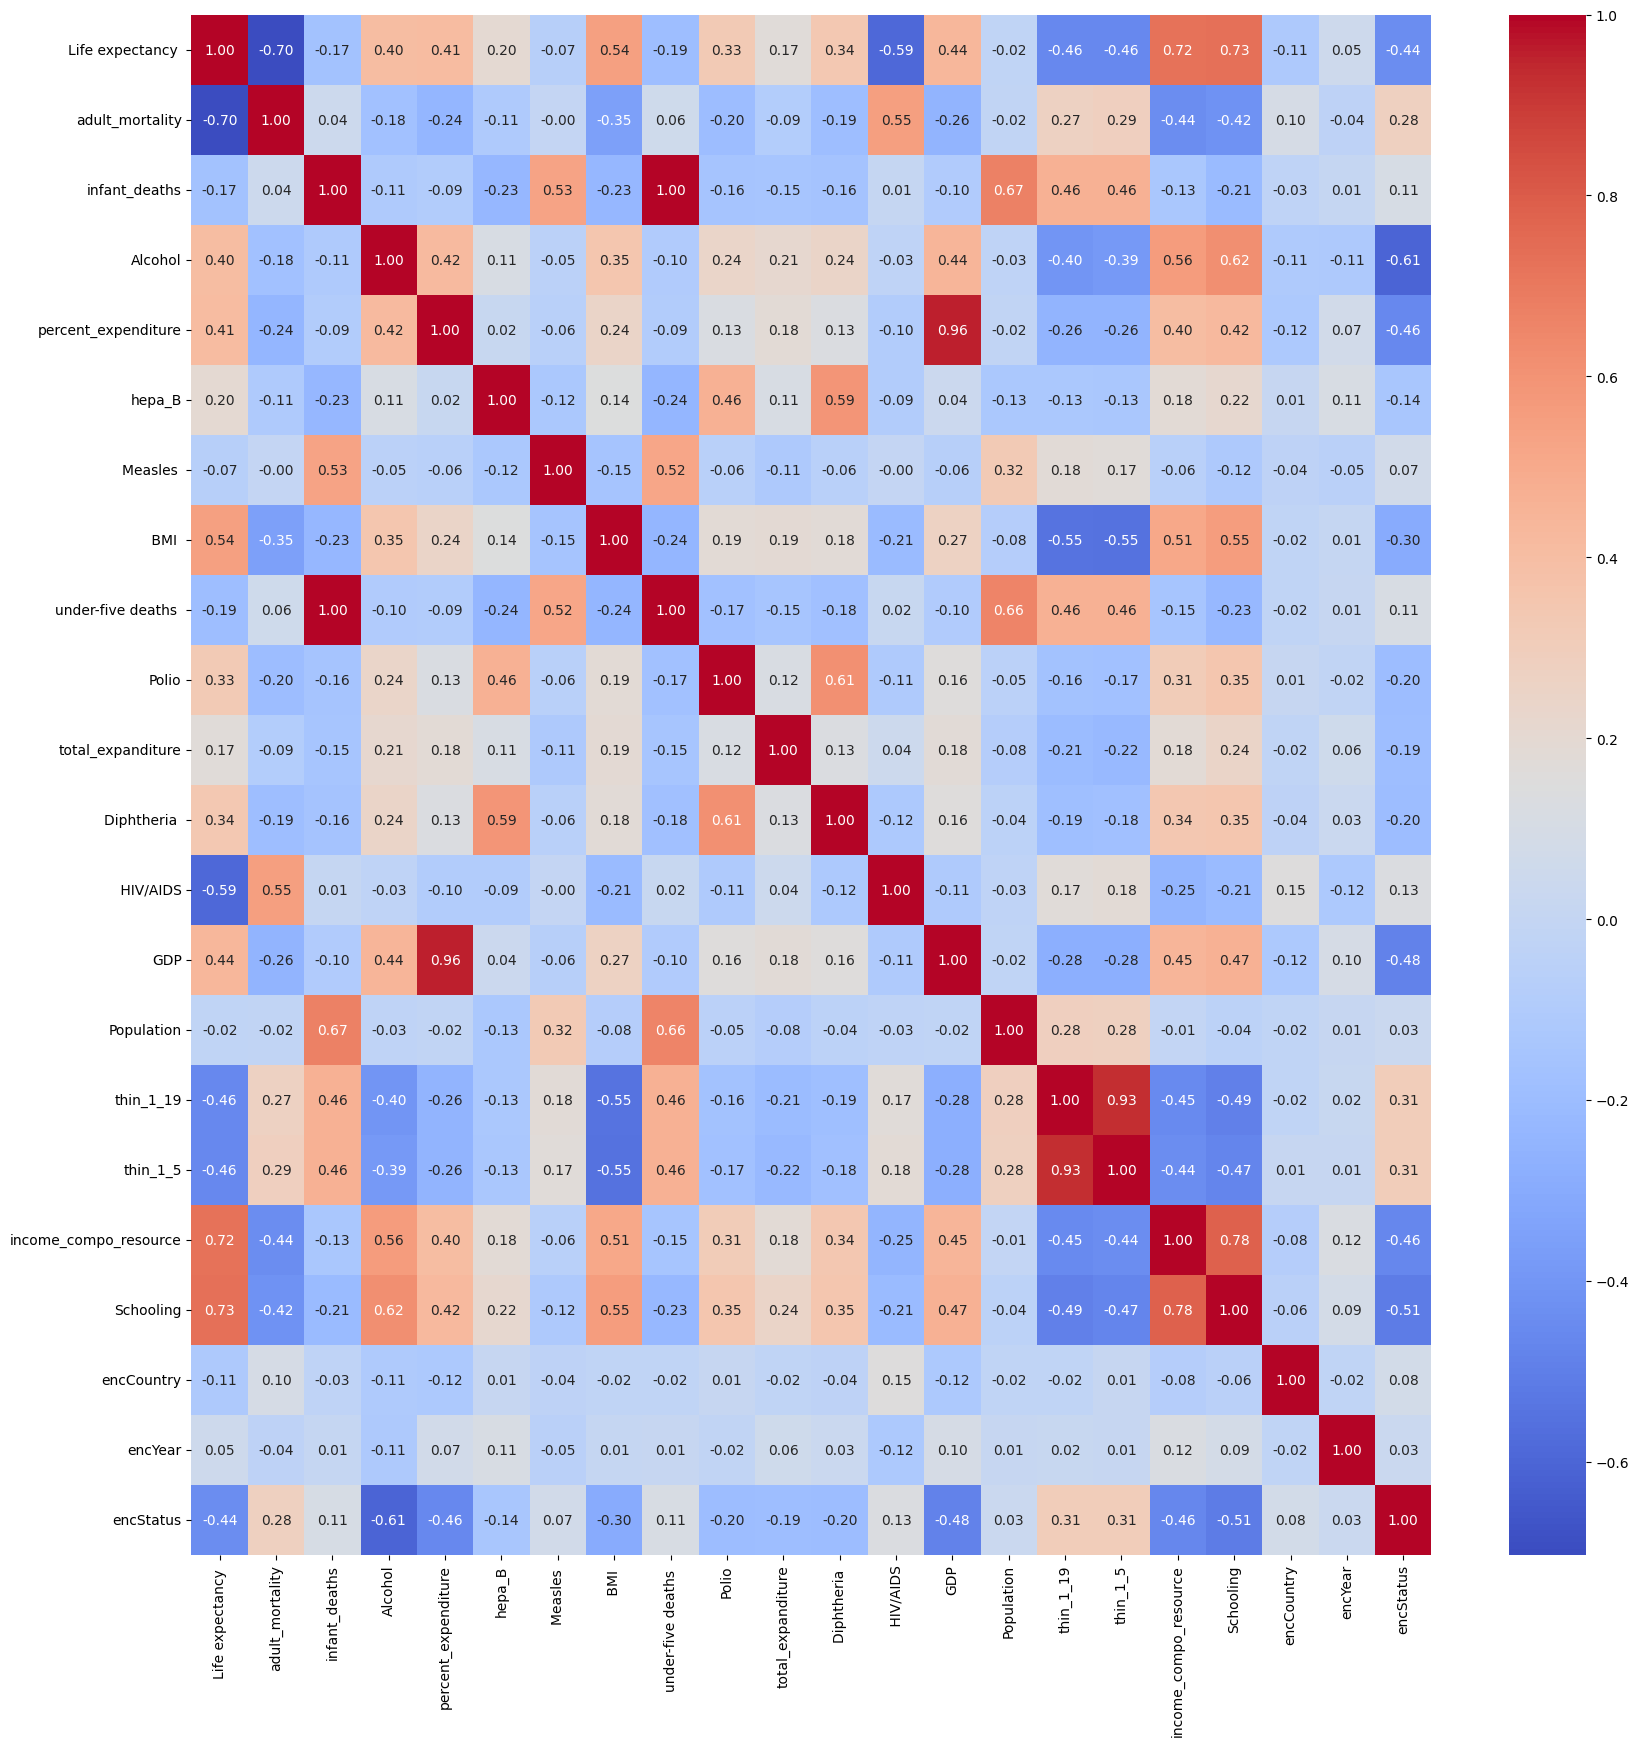

In [114]:
dfCorr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(dfCorr, annot=True, cmap = 'coolwarm', fmt= ".2f")
plt.show()


Training Linear Regression Models

In [128]:
#Declaring arrays
x = df
y = df['Alcohol']
print("x= ", x.shape, "\n", "y=", y.shape)

x=  (1649, 22) 
 y= (1649,)


In [116]:
#Creating train and test splits
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=0.3, random_state=150)
xTrain.shape
yTrain.shape

(1154,)

In [117]:
xTest.shape

(495, 22)

In [118]:
model = LinearRegression()
model.fit(xTrain, yTrain)

LinearRegression()

In [119]:
model.coef_

array([-4.41341826e-14, -1.49843834e-15, -1.09233880e-14,  1.00000000e+00,
       -4.33011653e-17,  2.42299624e-17,  7.78511298e-17,  2.19106447e-16,
        5.26025018e-15,  2.06272274e-16, -2.07962572e-16, -4.28737789e-16,
       -1.09962405e-15, -5.35135806e-18,  2.08461471e-21,  1.57235497e-16,
        3.52934479e-17,  1.17137190e-16, -8.08348931e-16, -1.80804053e-17,
        3.63418362e-16,  1.41379299e-16])

In [120]:
pd.DataFrame(model.coef_, x.columns, columns=['Coefficients'])

,Coefficients
Life expectancy,-4.413418e-14
adult_mortality,-1.498438e-15
infant_deaths,-1.092339e-14
Alcohol,1.000000e+00
percent_expenditure,-4.330117e-17
hepa_B,2.422996e-17
Measles,7.785113e-17
BMI,2.191064e-16
under-five deaths,5.260250e-15
Polio,2.062723e-16


In [121]:
y_pred = model.predict(xTest)

In [122]:
print(y_pred)

[8.400e-01 1.000e-02 1.205e+01 4.900e+00 8.620e+00 1.291e+01 2.430e+00
 6.260e+00 3.640e+00 1.000e-02 1.000e-02 4.140e+00 6.740e+00 7.000e-01
 4.380e+00 6.450e+00 6.370e+00 2.130e+00 1.024e+01 5.110e+00 4.440e+00
 2.880e+00 1.370e+00 2.770e+00 1.102e+01 1.000e-02 5.230e+00 3.990e+00
 6.500e+00 4.000e-02 6.000e+00 7.330e+00 1.000e-02 1.184e+01 3.810e+00
 3.000e-01 7.810e+00 7.670e+00 3.800e-01 8.540e+00 4.000e-02 1.000e-02
 1.000e-02 5.300e-01 1.000e-02 4.060e+00 1.190e+01 1.000e-02 1.000e-02
 9.100e-01 1.930e+00 7.550e+00 1.000e-02 4.080e+00 1.460e+00 2.550e+00
 1.037e+01 1.150e+01 1.620e+00 1.090e+00 6.800e-01 2.570e+00 6.120e+00
 9.670e+00 6.100e-01 1.031e+01 1.820e+00 9.700e-01 7.100e+00 7.700e+00
 1.660e+00 6.350e+00 6.660e+00 7.260e+00 5.380e+00 1.039e+01 5.160e+00
 5.790e+00 1.350e+00 7.730e+00 1.242e+01 2.900e+00 1.720e+00 8.490e+00
 5.800e-01 7.420e+00 2.370e+00 4.520e+00 5.000e-01 1.040e+01 6.390e+00
 1.179e+01 1.022e+01 9.000e-02 3.960e+00 1.000e-02 5.900e-01 5.140e+00
 5.000

Evaluation


In [123]:
MAE = metrics.mean_absolute_error(yTest,y_pred)
MSE = metrics.mean_squared_error(yTest,y_pred)
RMSE = np.sqrt(MSE)

In [124]:
MAE

6.345190611710672e-13

In [125]:
MSE

7.809710970404089e-25

In [126]:
RMSE

8.837256910605286e-13

In [129]:
testResid = yTest - y_pred
error = pd.DataFrame({'Error Values' : (testResid)})
error

,Error Values
1985,2.678968e-13
1652,4.589593e-13
235,-1.332268e-12
347,-1.634248e-13
1040,-3.215206e-13
...,...
1213,-1.279456e-12
2404,-4.467537e-13
270,-2.726708e-13
405,-4.156675e-13


In [130]:
error.hvplot.kde()

:Distribution   [Error Values]   (Density)

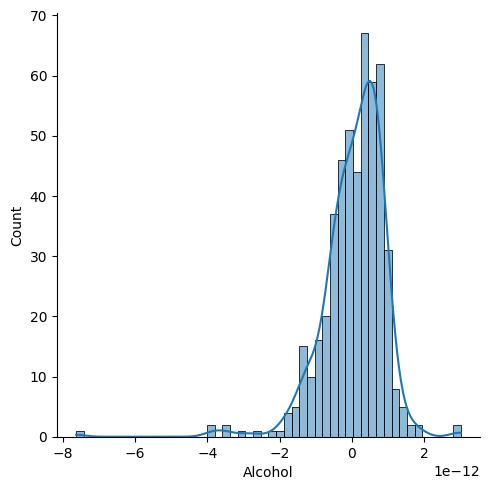

In [135]:

sns.displot(testResid, bins = 50, kde= True)
